In [6]:
import numpy as np
import pandas as pd
import pysr
#pysr.install()

COLOR = 'white'
import matplotlib as mpl
mpl.rcParams['text.color'] = "black"
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR


Precompiling PyCall...
Precompiling PyCall... DONE
PyCall is installed and built successfully.
c:\Users\HydraJ\.conda\envs\pysr_env\lib\site-packages\pysr\julia_helpers.py:39: UserWarning: It is recommended to restart Python after installing PySR's dependencies, so that the Julia environment is properly initialized.
  warnings.warn(


In [7]:
import os; print(os.environ["PATH"])

c:\Users\HydraJ\.conda\envs\pysr_env;C:\Users\HydraJ\.conda\envs\pysr_env;C:\Users\HydraJ\.conda\envs\pysr_env\Library\mingw-w64\bin;C:\Users\HydraJ\.conda\envs\pysr_env\Library\usr\bin;C:\Users\HydraJ\.conda\envs\pysr_env\Library\bin;C:\Users\HydraJ\.conda\envs\pysr_env\Scripts;C:\Users\HydraJ\.conda\envs\pysr_env\bin;C:\ProgramData\Anaconda3\condabin;C:\Program Files\Common Files\Oracle\Java\javapath;C:\ProgramData\Anaconda3;C:\ProgramData\Anaconda3\Library\mingw-w64\bin;C:\ProgramData\Anaconda3\Library\usr\bin;C:\ProgramData\Anaconda3\Library\bin;C:\ProgramData\Anaconda3\Scripts;C:\Windows\system32;C:\Windows;C:\Windows\System32\Wbem;C:\Windows\System32\WindowsPowerShell\v1.0;C:\Windows\System32\OpenSSH;C:\Program Files (x86)\Paragon Software\LinuxFS for Windows;C:\Strawberry\c\bin;C:\Strawberry\perl\site\bin;C:\Strawberry\perl\bin;C:\Program Files\PuTTY;C:\Program Files (x86)\GnuPG\bin;C:\Program Files\Git\cmd;C:\Users\HydraJ\AppData\Local\Programs\Julia-1.7.3\bin;C:\Users\HydraJ\A

In [8]:
import numpy as np

X = 2 * np.random.randn(100, 5)
y = 2.5382 * np.cos(X[:, 3]) + X[:, 0] ** 2 - 0.5

In [9]:
from pysr import PySRRegressor
model = PySRRegressor(
    model_selection="best",  # Result is mix of simplicity+accuracy
    niterations=40,
    binary_operators=["+", "*"],
    unary_operators=[
        "cos",
        "exp",
        "sin",
        "inv(x) = 1/x",
	# ^ Custom operator (julia syntax)
    ],
    extra_sympy_mappings={"inv": lambda x: 1 / x},
    # ^ Define operator for SymPy as well
    loss="loss(x, y) = (x - y)^2",
    # ^ Custom loss function (julia syntax)
)

In [10]:
model.fit(X, y)

c:\Users\HydraJ\.conda\envs\pysr_env\lib\site-packages\pysr\sr.py:1068: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


PySRRegressor.equations_ = [
	   pick      score                                           equation  \
	0         0.000000                                          3.6181715   
	1         1.148788                                          (x0 * x0)   
	2         0.003929                            (x0 * (x0 + 0.0761643))   
	3         0.938842                              ((x0 * x0) + cos(x3))   
	4         0.755326                ((x0 * x0) + (cos(x3) * 2.3532736))   
	5  >>>>  13.961466   (((x0 * x0) + (cos(x3) * 2.5382)) + -0.50000006)   
	6         0.113518  ((((x0 * x0) + -0.5724486) + (cos(x3) * 2.5382...   
	
	           loss  complexity  
	0  2.724225e+01           1  
	1  2.737904e+00           3  
	2  2.716474e+00           5  
	3  1.062360e+00           6  
	4  2.345331e-01           8  
	5  1.751576e-13          10  
	6  1.395816e-13          12  
]

## Toy example:   Wall spring mass

$$F=-kx=m\ddot{x}$$
$$Ansatz: \quad x(t) = C *e^{i\lambda t}$$
$$=>  \lambda = \pm \sqrt{\frac{k}{m}}$$ 

with initial conditions: 
$$x(0) = -1, \quad  \dot{x}(0) = 0$$

the solution becomes:

$$x(t) = -cos(\lambda t)$$

Text(0, 0.5, 'x(t)')

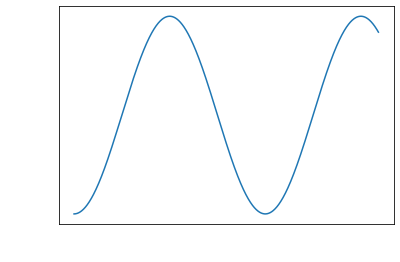

In [19]:
import matplotlib.pyplot as plt
t_grid = np.linspace(0,10,1000)
x = -np.cos(t_grid)
plt.plot(t_grid, x)
plt.xlabel("t")
plt.ylabel("x(t)")

In [ ]:
def get_derivative(f_x, x):
    